# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.


В данной работе постараемся оценить механизм формирования конечной стоимости квартир в Санкт-Петербурге и окресностях, выделив основные величины, которые наиболее сильно влияют на механизм ценообразования.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 50)

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

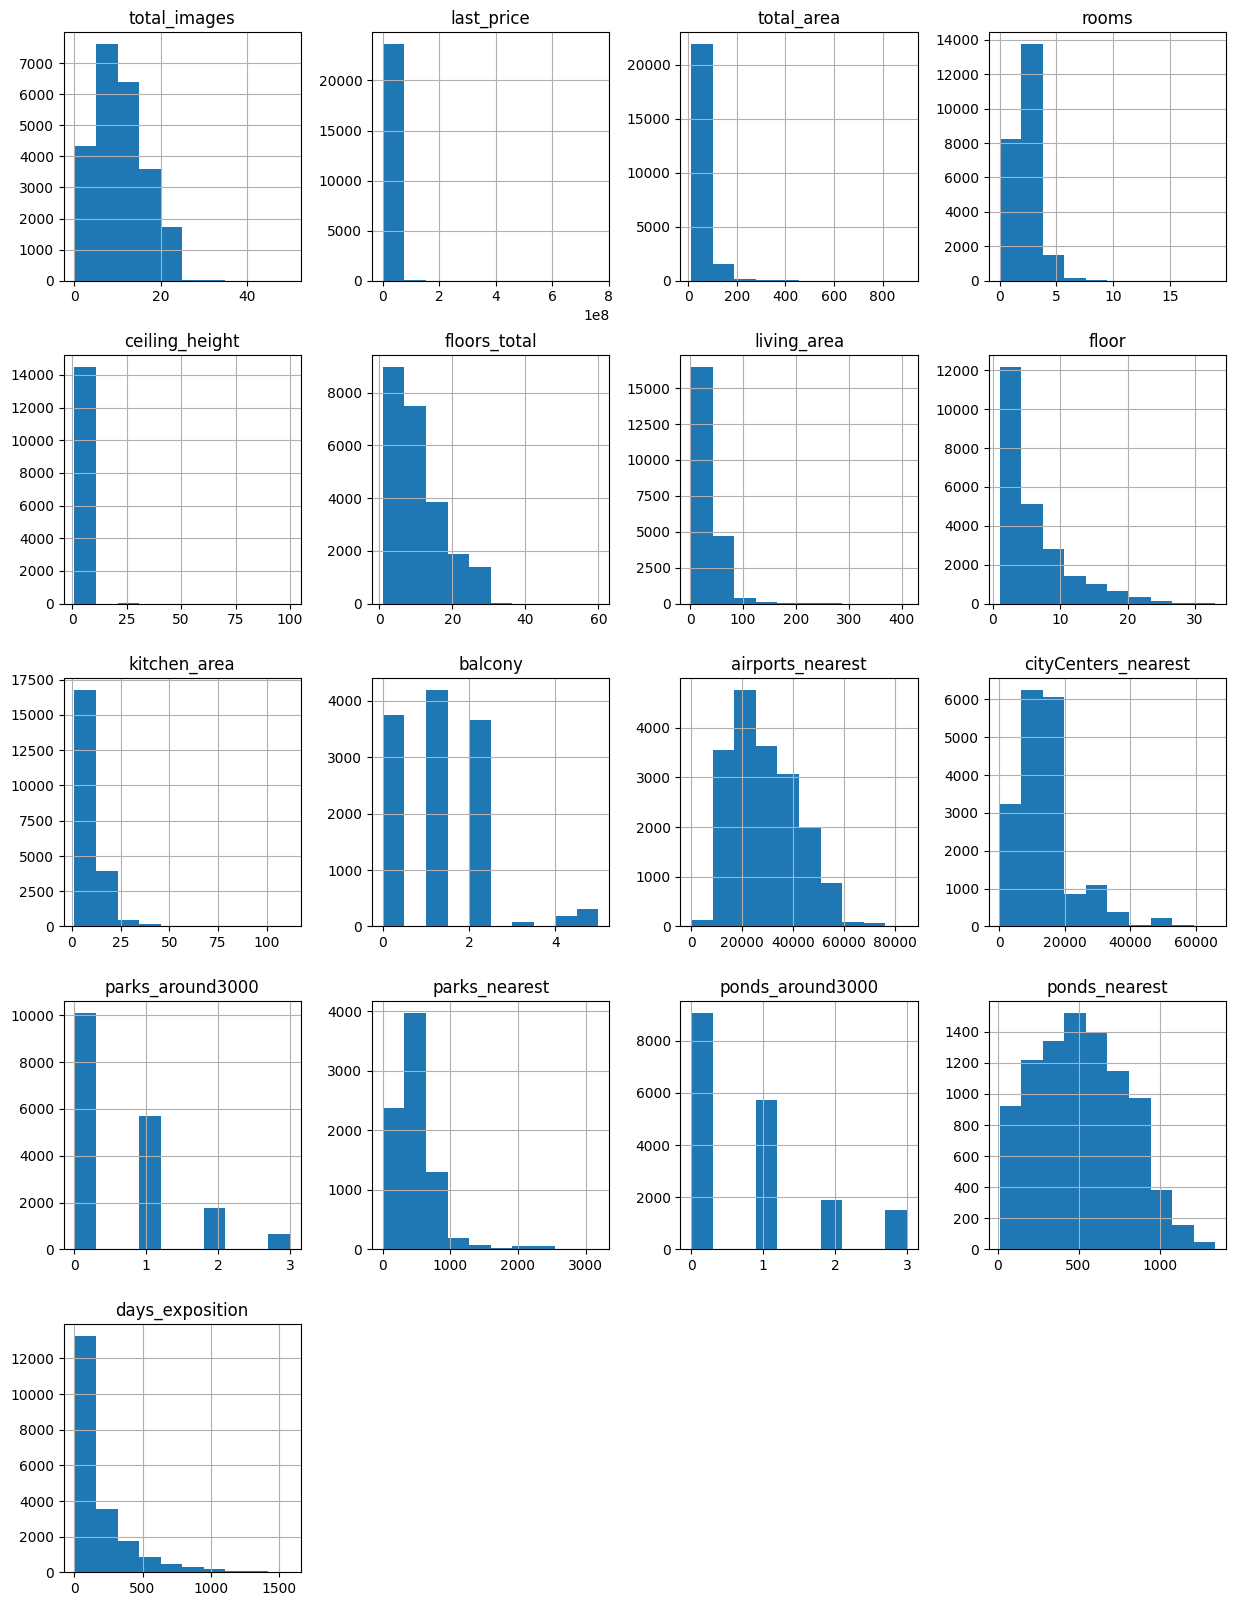

In [4]:
data.hist(figsize=(15, 20));

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Из предварительной оценки качества данных увидеть значительное количество пропусков в данных, которые были получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов. Это повод обратиться к людям, отвественным за выгрузку данных, возможно, получится исправить эти недочеты.

Из данных, заполняемых самим пользователем наибольшее количество пропусков в столбцах ceiling_height, is_apartment и balcony

### Выполните предобработку данных

In [9]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

Выявим наличие и количество пропущенных значений

In [10]:
pd.DataFrame({'Процент пропусков': data.isna().mean(), 'Количество пропусков':data.isna().sum()})

,Процент пропусков,Количество пропусков
total_images,0.000000,0
last_price,0.000000,0
total_area,0.000000,0
first_day_exposition,0.000000,0
rooms,0.000000,0
ceiling_height,0.387991,9195
floors_total,0.003629,86
living_area,0.080299,1903
floor,0.000000,0
is_apartment,0.882906,20924


Выберем стратегию обработки пропущенных значений.

**ceiling_height** (высота потолков) - имеет явные выбросы и неправдоподобные значения (высота потолка от 25 до 100 м). Пропуски заменим  медианным значением по зданиям с аналогичным количеством этажей. 

**floors_total** (количество этаже в здании) - столбец имееет всего 0,3% пропущенных строк, поэтому эти строки можно удалить.

**living_area, kitchen_area** (жилая площадь, площадь кухни) - пропущенные значения замеиним медианными по квартирам с аналигичным количестовм комнат. 

**is_apartment** (тип планировки "квартира") - проанализировав распределение значений, можно сделать вывод о том, что в колонках `is_apartment`, `studio`, `open_plan` не может быть одинаковых значений. Если количество комнат `rooms == 0`, значит квартира или студия, или с открытой планировкой, следовательно заполняем `is_apartment == False`. По аналогии если `studio == False and open_plan == False`, то `is_apartment == True`. 

**kitchen_area** (площадь кухни) - значения заменими медианым по количеству комнат. 

**balcony** (площадь балкона) - заполним "0", предположив балкон отсутствует. 

**locality_name** (название населенного пункта) - очень важный параметр, из которого будет исходить стоимость жилья. Заполнить часто встречающимся, средним или медианным занчением мы не можем, заполним эти значения `unknown`. 

**airports_nearest** (удаленность от аэропорта) - пропущенные значения заполним "0", запомнив, что аэропорт отсутствует вблизи населенного пункта. 

**city_centers_nearest** (удаленность от центра населенного пункта) - пропущенные значения заполним "0", запомнив, что это маленький населенный пункт (без центра). Пропуски в городе Санкт-Петербург мы удалим.

**parks_around_3000** (количество парков в радиусе 3 км), **parks_nearest** (удаленность от ближайшего парка), **ponds_around_3000** (количество прудов в радиусе 3 км), **ponds_nearest** (удаленность от ближайшего пруда) - заполним "0", приняв это за отсутствие пруда/парка по близости/в радиусе. 

**days_exposition** (количество дней в продаже) - остаим пока что как есть.


In [11]:
data.query("locality_name == 'Санкт-Петербург'")['city_centers_nearest'].isna().sum()

61

In [12]:
data = data[~((data['locality_name'] == 'Санкт-Петербург') & data['city_centers_nearest'].isna())]

Проверим наличие дубликатов

In [13]:
data.duplicated().sum()

0

Отработаем в первую очередь неявные дубликаты в колонке **locality_name**, перед этим заполнив пропущенные значения.

In [14]:
data = data.dropna(subset='locality_name')

In [15]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [16]:
def rename_locality(city):
    names = ['посёлок', 'городской', 'поселок', 
             'коттеджный', 'деревня', 'городского', 
             'имени', 'типа', 'при', 'садоводческое', 
             'железнодорожной', 'станции', 'садовое', 
             'некоммерческое', 'товарищество', 'село']
    filtered_city = [i for i in str(city).split() if i not in names]
    return ' '.join(filtered_city)

In [17]:
data['locality_name'] = data['locality_name'].apply(rename_locality)

In [18]:
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


Избавимся от пропущенных значений в колонке **floors_total**

In [19]:
data = data.dropna(subset='floors_total')

In [20]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Изучив уникальные значения высоты потолков, можно увидеть ряд неправдоподобных значений, таких как 1м и 100м. Также встречаются данные, похожие на ошибку в величине измерения, например высота не 27 метров, а 2.7 метра.
Для принятия решения и выбора способа обработки этих данных посмотрим сколько данных у нас удовлетваряют условиям:

In [21]:
print('Количество квартир с аномально высокими/низкими потолками', data.query("ceiling_height >= 6 or ceiling_height < 2").shape[0])
print('Количество квартир с потенциальной ошибкой в величине измерения потолков', data.query("20 <= ceiling_height <= 40").shape[0])

Количество квартир с аномально высокими/низкими потолками 33
Количество квартир с потенциальной ошибкой в величине измерения потолков 22


Количество значений не велико, так что нам ничего не мешает принять их за выбросы и удалить, однако попробуем обработать и первый и второй тип значений, в первом случае присвоив медианные значения высоты потолков по зданиям с аналогичной этажностью, а во втором случае умножим значения на 0,1.

In [22]:
data.loc[(data['ceiling_height'] >= 6) | (data['ceiling_height'] < 2), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] >= 6) | (data['ceiling_height'] < 2), 'floors_total'].map(lambda x: data.loc[data['floors_total'] == x, 
                                                                                         'ceiling_height'].median())

In [23]:
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 40), 'ceiling_height'] = \
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 40), 'ceiling_height'] * 0.1

Есть несколько квартир которые хотелось бы обработать вручную, потому что их количесто мало, занчения выбиваются из заданных условий

In [24]:
data.loc[(data['floors_total'].isin([33, 36, 37])), 'ceiling_height'] = data.loc[(data['floors_total'] == 35), 'ceiling_height'].median()

Теперь заполним пропуски в столбце **ceiling_height**

In [25]:
for ceil in data.loc[data['ceiling_height'].isna()]['floors_total'].unique():   
    data.loc[(data['floors_total'] == ceil) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == ceil), 'ceiling_height'].median()

In [26]:
data['ceiling_height'].sort_values().unique()

array([2.  , 2.2 , 2.25, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49,
       2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 ,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98,
       4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.

Заметим, что в колонке rooms пропуски отсутствуют, но зато часто присутствуетзначение 0, однако комнат не быть не может, поэтому этим значениям 1, как начальную точку отсчета количества комнат.

In [27]:
data.loc[data['rooms'] == 0, 'rooms'] = 1

In [28]:
for rooms in data['rooms'].unique():
    data.loc[(data['rooms'] == rooms) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == rooms), 'living_area'].median()
    
    data.loc[(data['rooms'] == rooms) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == rooms), 'kitchen_area'].median()

Заполнима значения в столбцах `is_apartment` и `balcony`

In [29]:
data.loc[data['rooms'] == 0, 'is_apartment'] = \
data.loc[data['rooms'] == 0, 'is_apartment'].fillna(False)

data.loc[(data['studio'] == True) | (data['open_plan'] == True), 'is_apartment'] = \
data.loc[(data['studio'] == True) | (data['open_plan'] == True), 'is_apartment'].fillna(False)

data.loc[(data['studio'] == False) & (data['open_plan'] == False), 'is_apartment'] = \
data.loc[(data['studio'] == False) & (data['open_plan'] == False), 'is_apartment'].fillna(True)

In [30]:
data['balcony'] = data['balcony'].fillna(0)

Изменим тип данных в некоторых столбцах

In [31]:
data[['airports_nearest', 'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000','ponds_nearest']] = \
data[['airports_nearest', 'city_centers_nearest', 'parks_around_3000', 'parks_nearest', 'ponds_around_3000','ponds_nearest']].fillna(0)

In [32]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3136
dtype: int64

In [33]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

lst = ['floors_total', 'parks_around_3000', 'ponds_around_3000']

for i in lst:
    data[i] = data[i].astype('int')

Проведем контрольную проверку результатов преобразований и обработки пропущенных значений

In [34]:
data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23505 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23505 non-null  int64         
 1   last_price            23505 non-null  float64       
 2   total_area            23505 non-null  float64       
 3   first_day_exposition  23505 non-null  datetime64[ns]
 4   rooms                 23505 non-null  int64         
 5   ceiling_height        23505 non-null  float64       
 6   floors_total          23505 non-null  int32         
 7   living_area           23505 non-null  float64       
 8   floor                 23505 non-null  int64         
 9   is_apartment          23505 non-null  object        
 10  studio                23505 non-null  bool          
 11  open_plan             23505 non-null  bool          
 12  kitchen_area          23505 non-null  float64       
 13  balcony              

In [35]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,True,False,False,11.0,2.0,Шушары,12817.0,18603.0,0,0.0,0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,True,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


### Добавьте в таблицу новые столбцы

In [36]:
data.insert(2, 'sqr_metr_price', (data['last_price'] / data['total_area']).round(1))

In [37]:
data.insert(5, 'week_day', data['first_day_exposition'].dt.weekday)

In [38]:
data.insert(6, 'month_exp', data['first_day_exposition'].dt.month)

In [39]:
data.insert(7, 'year_exp', data['first_day_exposition'].dt.year)

In [40]:
data.insert(13, 'floor_type', data['floor'].where(data['floor'] == data['floors_total'], 'Другой')
                                           .where(data['floor'] != 1, 'Первый')
                                           .where(data['floor'] != data['floors_total'], 'Последний'))

In [41]:
data.insert(22, 'city_center_km', round(data['city_centers_nearest'] / 1000, 0))
data['city_center_km'] = data['city_center_km'].astype('int')

In [42]:
data.head()

,total_images,last_price,sqr_metr_price,total_area,first_day_exposition,week_day,month_exp,year_exp,rooms,ceiling_height,floors_total,living_area,floor,floor_type,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,city_center_km,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,120370.4,108.0,2019-03-07,3,3,2019,3,2.70,16,51.0,8,Другой,True,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,16,1,482.0,2,755.0,NaN
1,7,3350000.0,82920.8,40.4,2018-12-04,1,12,2018,1,2.75,11,18.6,1,Первый,True,False,False,11.0,2.0,Шушары,12817.0,18603.0,19,0,0.0,0,0.0,81.0
2,10,5196000.0,92785.7,56.0,2015-08-20,3,8,2015,2,2.55,5,34.3,4,Другой,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,14,1,90.0,2,574.0,558.0
3,0,64900000.0,408176.1,159.0,2015-07-24,4,7,2015,3,2.60,14,45.0,9,Другой,True,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,7,2,84.0,3,234.0,424.0
4,2,10000000.0,100000.0,100.0,2018-06-19,1,6,2018,2,3.03,14,32.0,13,Другой,True,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,8,2,112.0,1,48.0,121.0


### Проведите исследовательский анализ данных

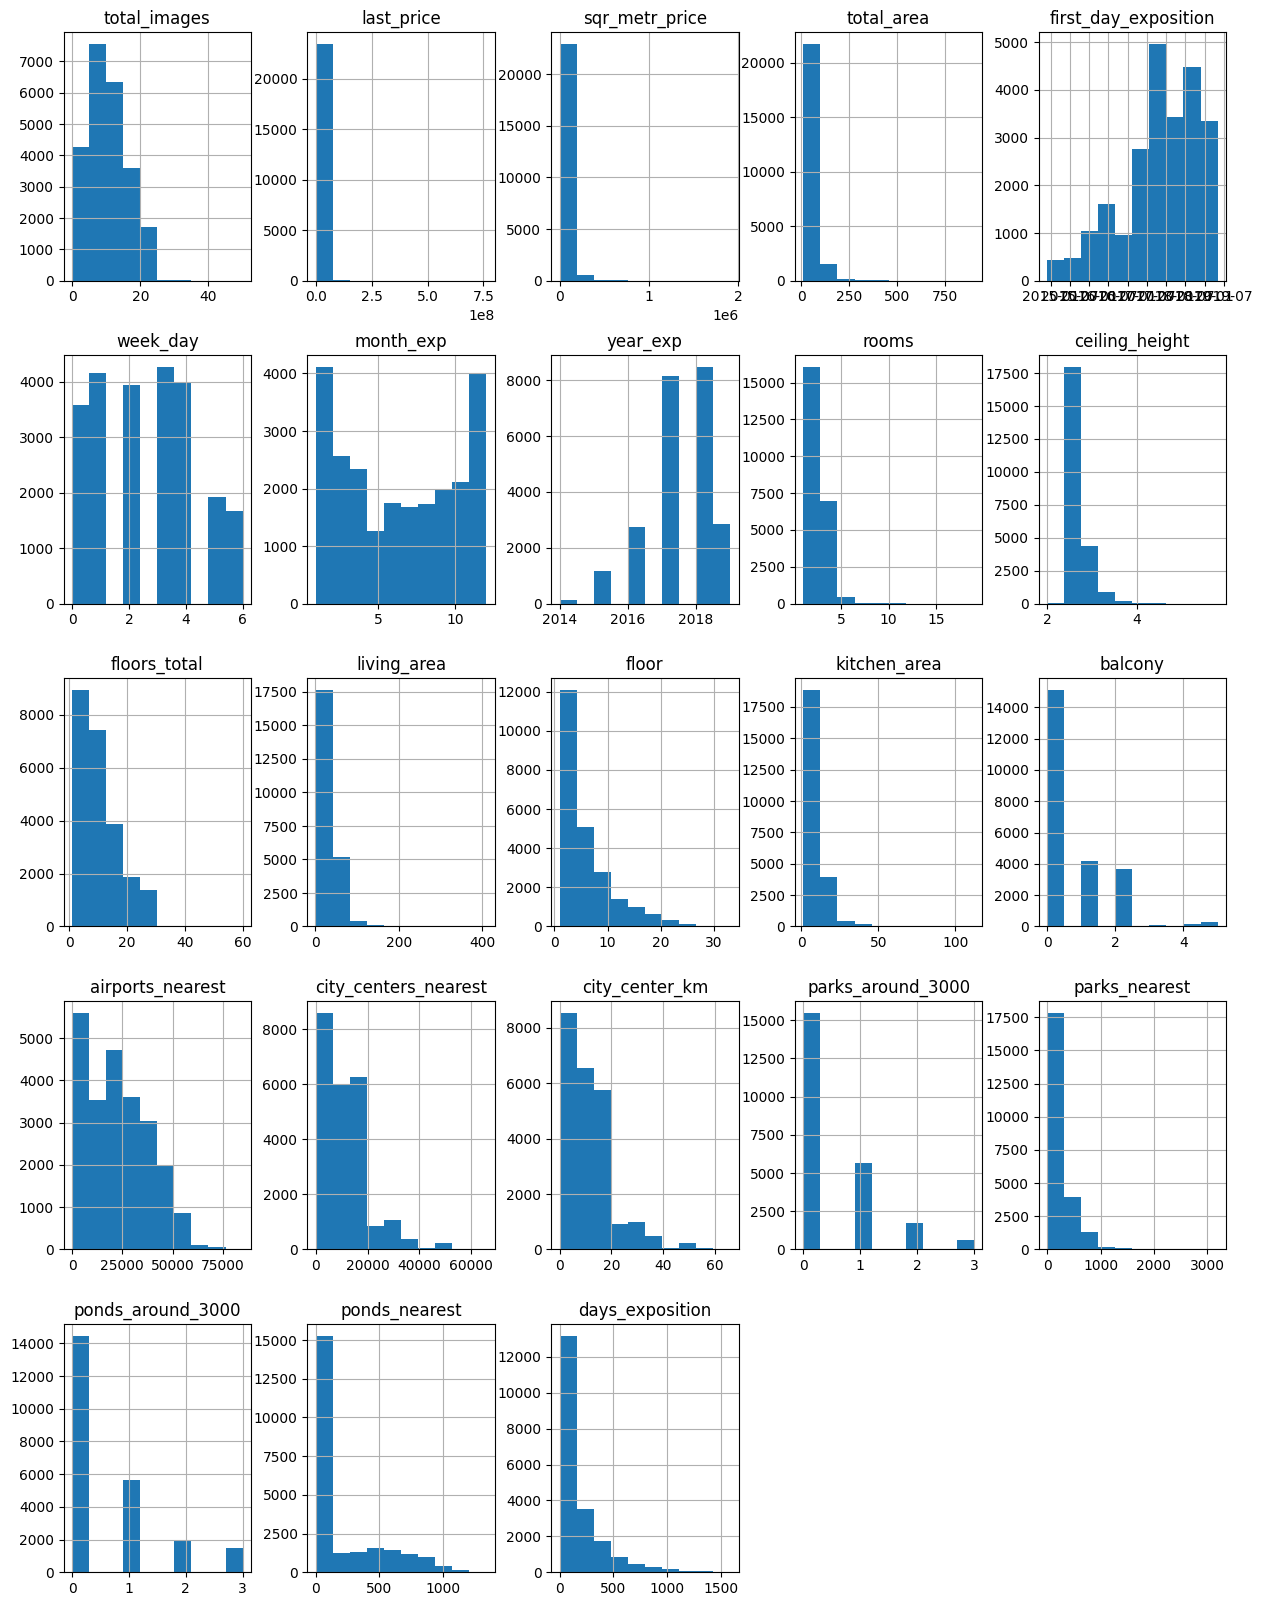

In [43]:
data.hist(figsize=(15, 20));

В результате предобработки и заполнения данных не имзменилось распределение значений этажей, площади жилой, кухни. Как минимум наше заполнение не нарушило распределение данных - это плюс. 

Распределение высоты потолков стало выглядеть правдоподобнее, также как и геолокационные данные.

Можно отметить тенденцию активности выкладывания объявлений. Наиболее часто люди решаются на продажу зимой (начало/конец года)

Чаще всего встречается (при наличии) один пруд/парк в пределах 500 метров.


Рассмотрим подробнее как распределяется время объявлений в продаже

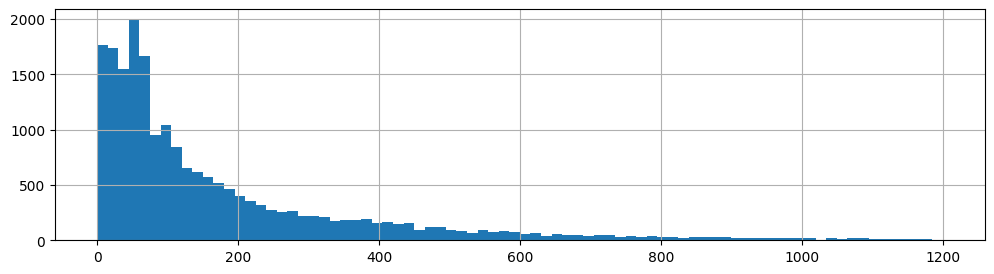

In [44]:
data['days_exposition'].hist(bins=80, range=(0, 1200), figsize=(12,3))
plt.show()

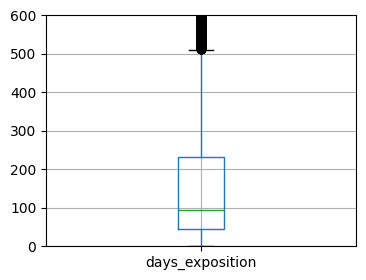

In [45]:
data.boxplot('days_exposition', figsize=(4, 3))
plt.ylim(0, 600)
plt.show()

In [46]:
print('Среднее количество дней в продаже: ', data['days_exposition'].mean())
print('Медианное количество дней в продаже: ', data['days_exposition'].median())
print('Третий квартиль: ', data['days_exposition'].quantile(0.75))

Среднее количество дней в продаже:  180.76960086405813
Медианное количество дней в продаже:  95.0
Третий квартиль:  231.0


Медианное количества дней продажи квартиры - 95. Среднее количество - 180. Такой разброс значений (в 2 раза) скорее всего случися из-за аномально длинных размещений  1000 и более дней, поэтому ориентироваться будем на медианный показатель. Долгой можно считать продажу, превышающую 3 квартиль - 232 дня (7 месяцев), а аномально долгую - более 500 дней.

Попробуем отыскать какой из параметров оказывает наибольшее влияние на стоимость квартиры.

In [47]:
df = data.copy()
#Отфильтруем аномально высокую стоимость (>150 млн.рублей), для наилучшей читаемости графиков и введем столбец стоимости квартир в миллионах.
df['price_in_milloins'] = df['last_price'].map(lambda x: round((x / 10**6), 2))
df = df.loc[df['price_in_milloins'] < 150]

In [48]:
print(f'При фильтрации по стоимости мы потеряли {round(100 - (df.shape[0]/data.shape[0] * 100), 2)} % данных.')

При фильтрации по стоимости мы потеряли 0.07 % данных.


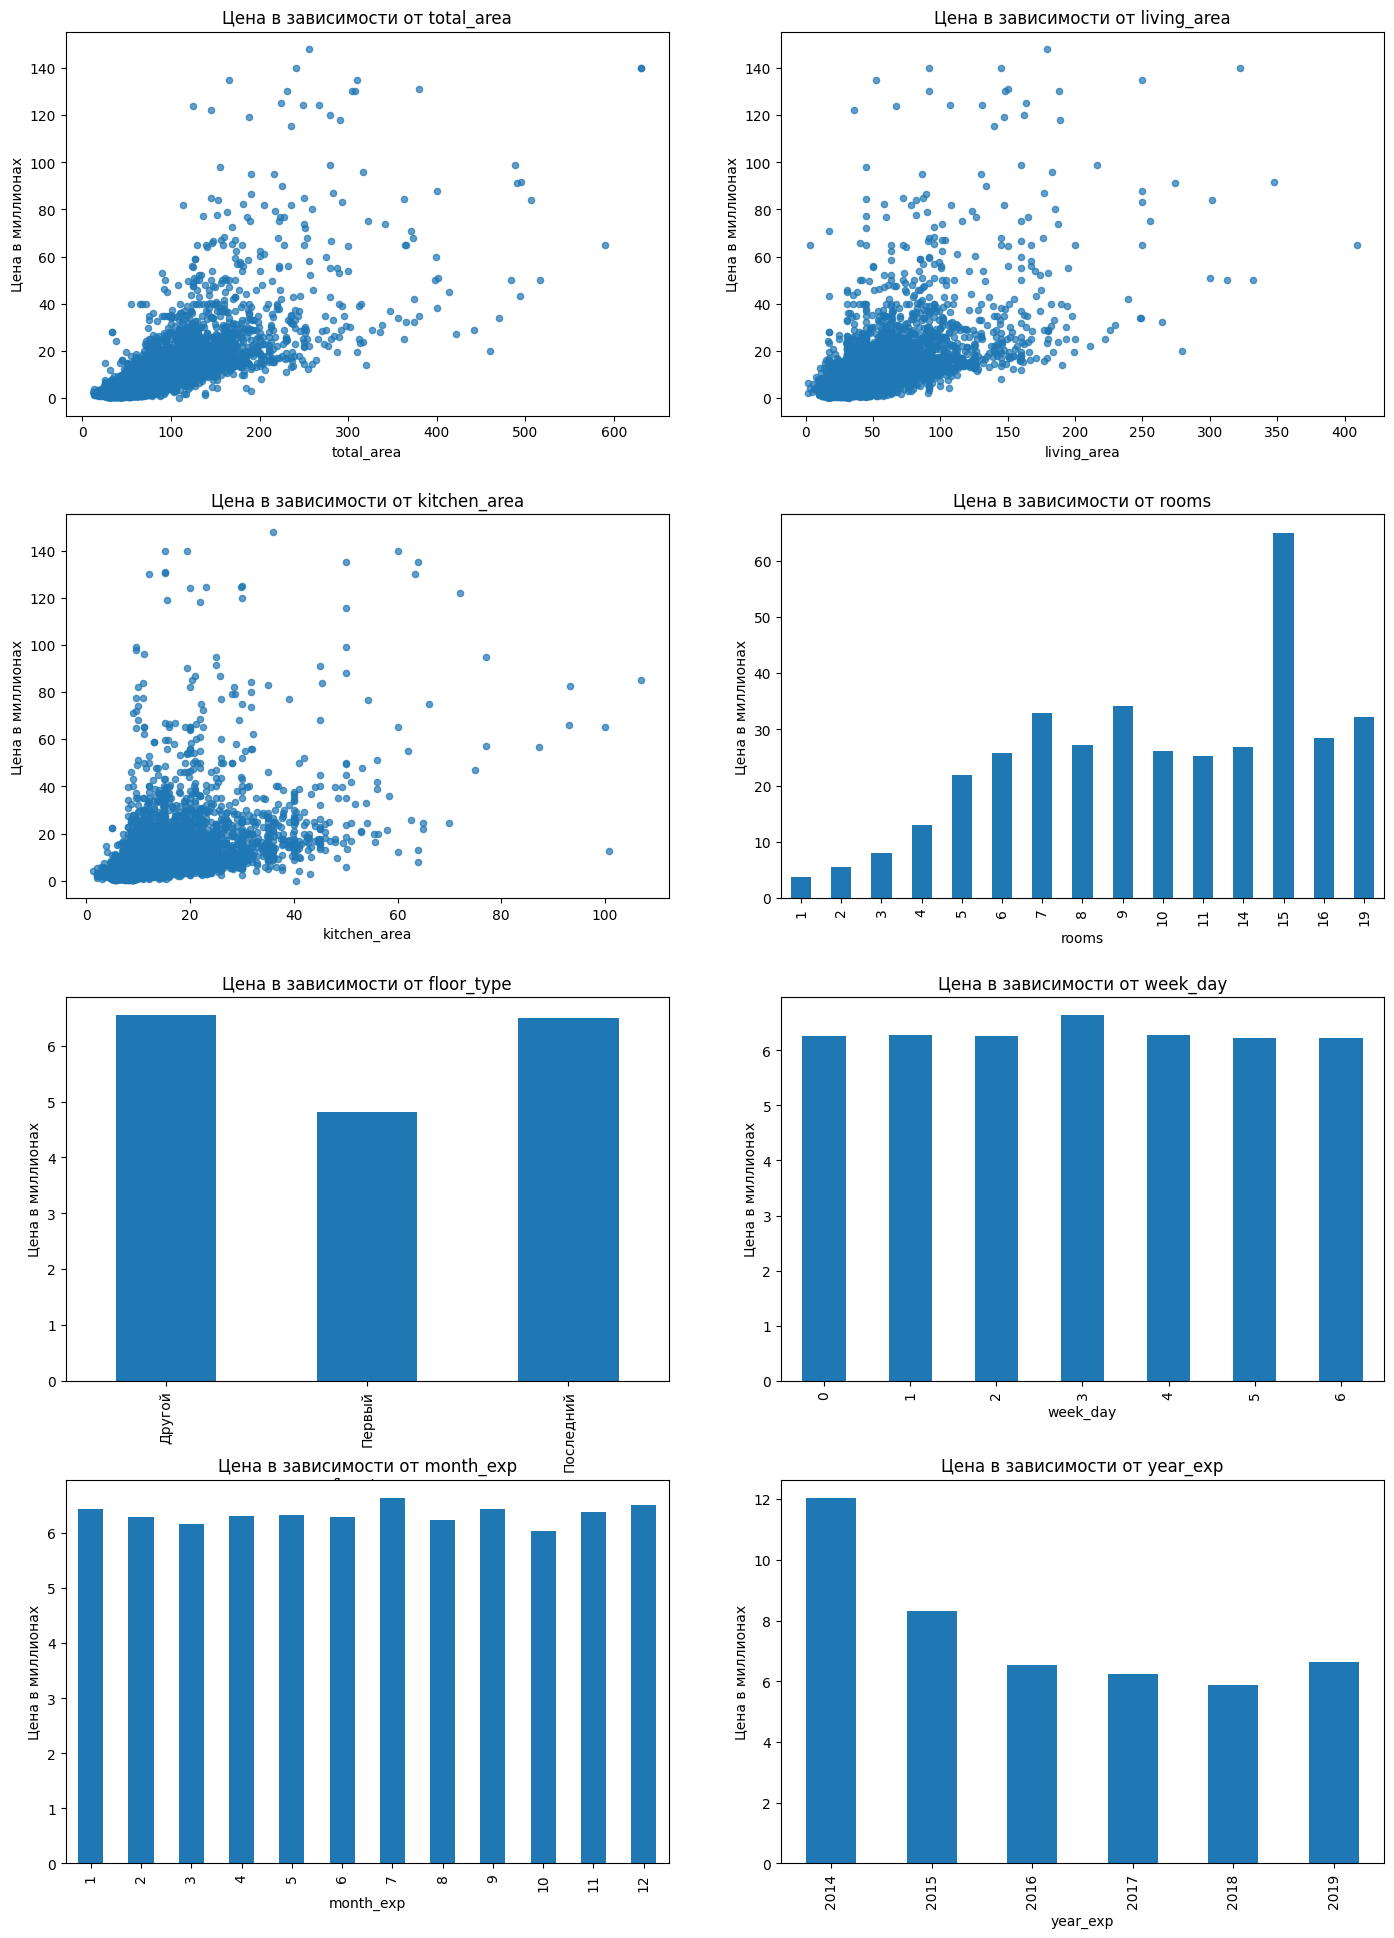

In [49]:
parameters = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'week_day', 'month_exp', 'year_exp']

fig, axs = plt.subplots(4, 2, figsize=(15, 20))
fig.tight_layout(pad=5)

for i, param in enumerate(parameters):
    ax = axs[i // 2, i % 2] 
    if param in ['total_area', 'living_area', 'kitchen_area']:
        df.plot(x=param, y='price_in_milloins', kind='scatter', title=f'Цена в зависимости от {param}', alpha=0.7, ax=ax)
    else:
        df.groupby(param)['price_in_milloins'].mean().plot(kind='bar', title=f'Цена в зависимости от {param}', ax=ax)
    ax.set_xlabel(param)
    ax.set_ylabel('Цена в миллионах')

plt.show()

In [50]:
df[['price_in_milloins', 'total_area', 'living_area', 'kitchen_area']].corr()

,price_in_milloins,total_area,living_area,kitchen_area
price_in_milloins,1.000000,0.751004,0.642119,0.545487
total_area,0.751004,1.000000,0.911382,0.574844
living_area,0.642119,0.911382,1.000000,0.406667
kitchen_area,0.545487,0.574844,0.406667,1.000000


В результате анализа графиков можно сделать вывод о том что есть зависимость между стоимостью квартиры и общей площадью. Зависимость стоимости от таких факторов как площадь кухни и жилой площади присутствует только потому, что эти параметры зависят от общей площади.

С увеличением числа комнат растет и стоимость квартир, однако после 7 комнат выходит на относительное плато, где зависимость уже явно не прослеживается. А вот квартиры не на первом этаже действительно ценятся чуть больше.

День недели и месяц выкладки на стоимость не влияют.

Оказалось удивительно что с 2014 года средняя стоимость квартиры наоборот уменьшилась (фильтр по стоимость меньше 150 млн.руб. не оказывает на это влияние). Возможно на это повлияло низкое количество объявлений. Но вот то, что нельзя не заметить, это увеличение количества объявлений в 2017-2018 годах, возможно просто было построено много нового доступного жилья, что занижало бы среднюю стоимость.

Проверив, выяснилось:
**Петербург в 2017 году побил собственный рекорд по строительству за всю новейшую историю города. Годовой план был перевыполнен на 17%** (*https://78.ru/news/2018-04-24/peterburg_v_2017_godu_pobil_rekordi_po_stroitelstvu*)

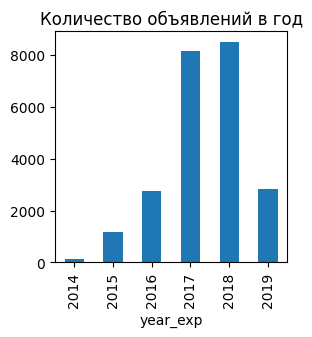

In [51]:
df.groupby('year_exp')['price_in_milloins'].count().plot(kind='bar', title='Количество объявлений в год', figsize=(3, 3));

Посчитайтем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [52]:
biggest_cities = (data.groupby('locality_name')['sqr_metr_price'].agg(['count', 'mean'])
                   .sort_values(by='count', ascending=False)
                   .head(10) 
                   .reset_index()
                 )
biggest_cities['mean'] = biggest_cities['mean'].astype('int')
biggest_cities.columns = ['locality_name', 'count_of_ads', 'mean_sqr_meter_price']
biggest_cities

,locality_name,count_of_ads,mean_sqr_meter_price
0,Санкт-Петербург,15591,114708
1,Мурино,586,86041
2,Кудрово,470,95260
3,Шушары,439,78551
4,Всеволожск,398,68654
5,Пушкин,369,103125
6,Колпино,338,75424
7,Парголово,327,90175
8,Гатчина,307,68746
9,Выборг,237,58141


Средняя стоимость квадратного метра в городе Санкт-Петербург - `114708 рублей`

In [65]:
data.loc[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='city_center_km', values='sqr_metr_price')

,sqr_metr_price
city_center_km,
0,245833.533333
1,177005.408333
2,157849.007742
3,121507.834770
4,133282.872674
5,140453.957377
6,151012.194175
7,156176.880714
8,125649.732155


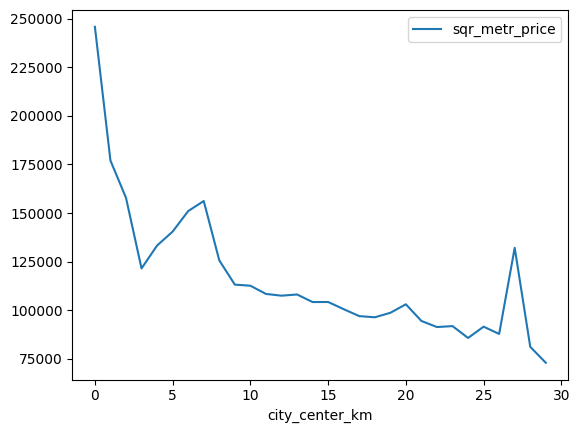

In [54]:
data.loc[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='city_center_km', values='sqr_metr_price').plot()
plt.show()

Четкая зависимость цены прослеживается от расстояния до центра города. Тут все логично: чем дальше от центра - тем дешевле.

### Напишите общий вывод

В результате ииследования была выполнена предобработка данных, заполнены там где это было возможно. Стоит обратить внимание на механизм автоматической выгрузки геолокационных данных - в них много пропусков.

В процессе анализа вявлена зависимость стоимости квартиры от ее площади и удаленности от центра. Также на стоимость могут влиять факторы, которые сами прямо или косвенно зависят от общей площади квартиры (такие как количество комнат, площадь жилая, кухни).

Чаще всего выкладювают объявление о продаже квартиры зимой.

С годами количество объявлений о продаже выросло, а средняя стоимость квартиры упала, что, скорее всего, связано с обильной застройкой города доступным жильем.

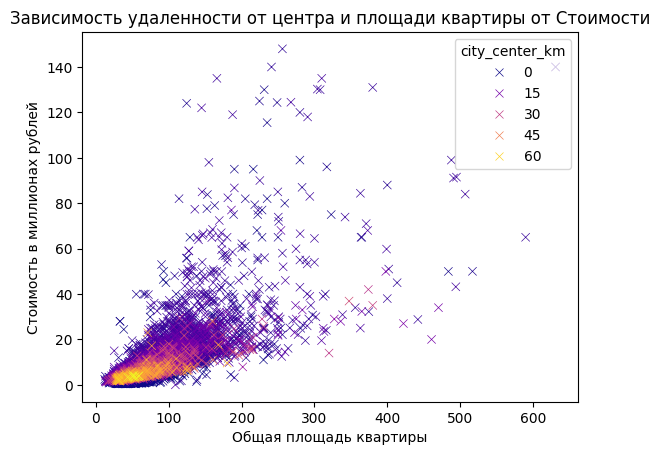

In [66]:
graphic = sns.scatterplot(data=df.sort_values(by='city_center_km'), x='total_area', y='price_in_milloins', hue='city_center_km', marker='x', palette="plasma")
graphic.set_title('Зависимость удаленности от центра и площади квартиры от Стоимости')
graphic.set_xlabel('Общая площадь квартиры')
graphic.set_ylabel('Стоимость в миллионах рублей')
plt.show()

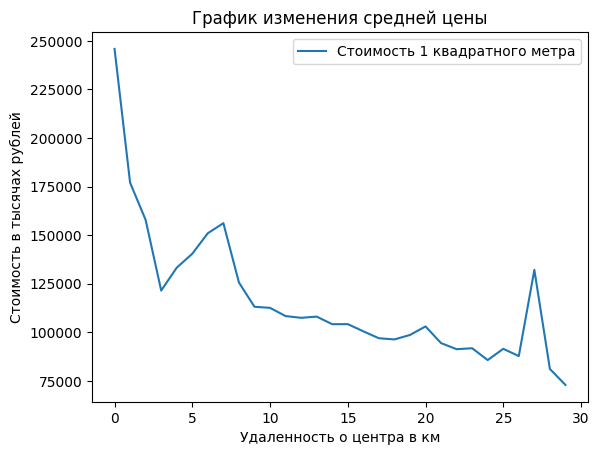

In [63]:
dist_dep = data.loc[data['locality_name'] == 'Санкт-Петербург']\
                .pivot_table(index='city_center_km', values='sqr_metr_price')\
                .plot(title='График изменения средней цены')

dist_dep.set_xlabel('Удаленность о центра в км')
dist_dep.set_ylabel('Стоимость в тысячах рублей')
dist_dep.legend(['Стоимость 1 квадратного метра'])
plt.show()

Все оказалось тривиальным. Чем дальше от города, меньше квадратура, меньше комнат - тем дешевле. Чем ближе к центру, больше комнат, больше квадратура - тем дороже.